In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sn

In [57]:
df=pd.read_csv('Realme_8_pro_review .csv')
df.head()

,Rating,Review,Sentiment
0,4,Wonderful,positive
1,4,Value-for-money,positive
2,4,Good choice,positive
3,3,Does the job,positive
4,5,Wonderful,positive


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rating     670 non-null    int64 
 1   Review     670 non-null    object
 2   Sentiment  670 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.5+ KB


In [59]:
df.shape

(670, 3)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

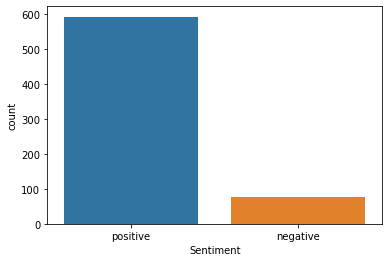

In [60]:
#Here plotting the count of positive and negative reviews 
sn.countplot(x='Sentiment', data=df)

In [61]:
#Here we are transforming sentiment column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Sentiment']=lb.fit_transform(df['Sentiment'])
df.head()

,Rating,Review,Sentiment
0,4,Wonderful,1
1,4,Value-for-money,1
2,4,Good choice,1
3,3,Does the job,1
4,5,Wonderful,1


In [ ]:
#Here we are removing all the symbols and numerics other than alphabet and converting it into lower case.
x=[]

import re

for i in df['Review']:
    review=re.sub('[^a-zA-z]',' ',i)
    review=review.lower()
    x.append(review)
print(x)

In [70]:
df['Review']=x
df.head()

,Rating,Review,Sentiment
0,4,wonderful,1
1,4,value for money,1
2,4,good choice,1
3,3,does the job,1
4,5,wonderful,1


In [73]:
X=df['Review']
y=df['Sentiment']

In [74]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split
  
# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [75]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
  
# To extract maximum 1500 features. 
# "max_features" is attribute to experiment with to get better results
cv = CountVectorizer(max_features = 1500) 



In [76]:
# Fitting Logistic Regression Classification
# to the Training set
from sklearn.linear_model import LogisticRegression

#Creating a model for the Logistic Regression
lr=LogisticRegression(solver='lbfgs')
                              


In [77]:
#We are using pipeline to predict the input when it comes to end
from sklearn.pipeline import Pipeline

In [78]:
#Creating pipeline model and giving vectorizer and classifier in pipeline
model= Pipeline([('vectorizer',cv),('classifier',lr)])

In [79]:
#Here we training the model

model.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(max_features=1500)),
                ('classifier', LogisticRegression())])

In [80]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

# Predicting the Test set results
y_pred = model.predict(X_test)
  
  
cm = confusion_matrix(y_pred, y_test)
  
cm

array([[ 15,   0],
       [  8, 145]], dtype=int64)

<AxesSubplot:>

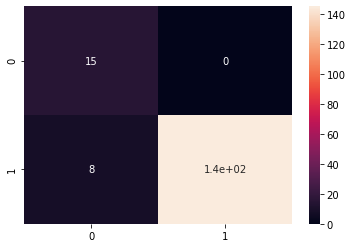

In [81]:
#Displays the confusion matrics in heat map
sn.heatmap(cm,annot=True)

In [84]:
#Checking the accuracy score of the model
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.9523809523809523

In [85]:
#Here we checking the model with an example

Example=['I,am happy']
result=model.predict(Example)
result

array([1])